In [3]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
fetch_housing_data()

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


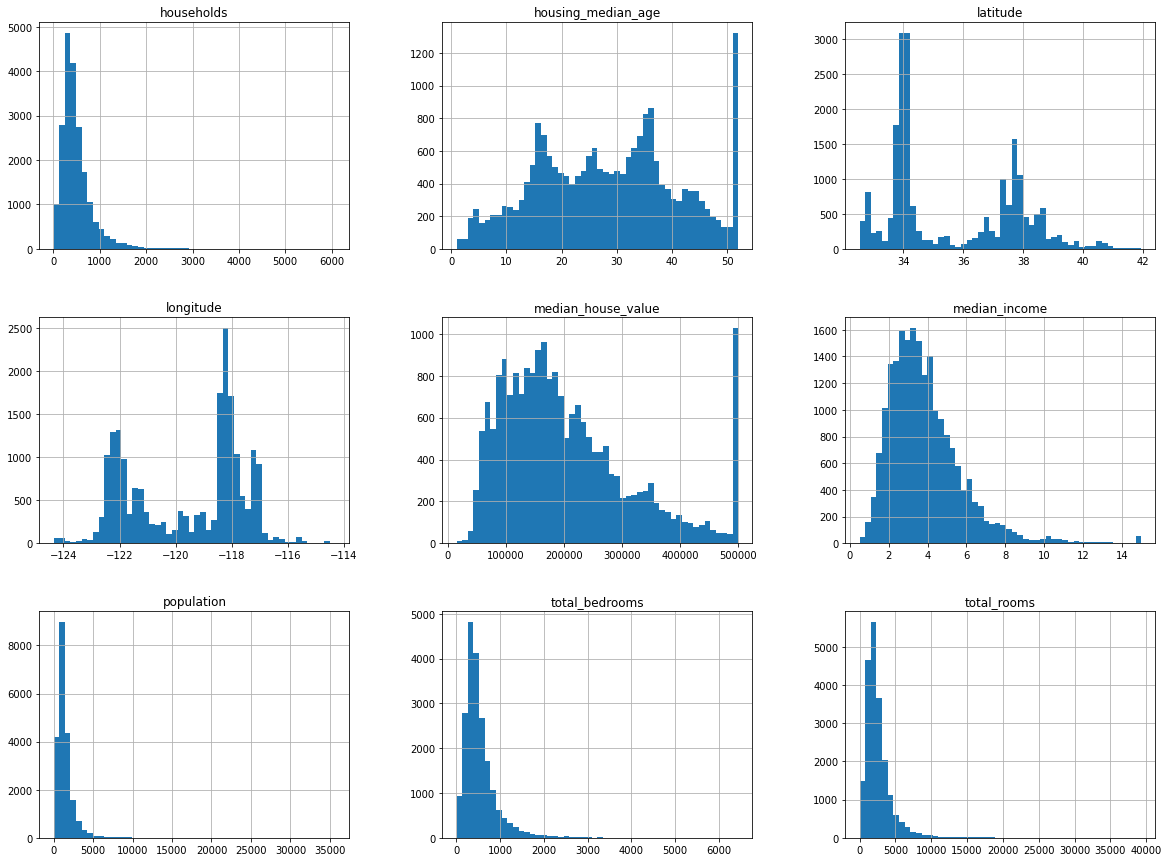

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indeces = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indeces = shuffled_indeces[:test_set_size]
    train_indeces = shuffled_indeces[test_set_size:]
    return data.iloc[train_indeces], data.iloc[test_indeces]

In [12]:
train_set, test_set = split_train_test(housing, .2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [13]:
train_set, test_set = split_train_test(housing, .2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [14]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20093,-120.12,38.12,37.0,3355.0,666.0,338.0,136.0,2.0625,88900.0,INLAND
5627,-118.27,33.77,39.0,1731.0,485.0,2115.0,478.0,1.5369,141300.0,NEAR OCEAN
506,-122.29,37.84,35.0,1872.0,419.0,1017.0,414.0,2.2106,132500.0,NEAR BAY
19319,-122.98,38.44,29.0,4450.0,939.0,1328.0,590.0,3.1000,162100.0,<1H OCEAN
1715,-122.31,38.00,29.0,3108.0,534.0,1687.0,516.0,4.3333,170800.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
12516,-121.47,38.56,52.0,889.0,162.0,273.0,145.0,3.1250,85600.0,INLAND
6152,-117.96,34.10,30.0,2775.0,657.0,2847.0,642.0,3.2266,141800.0,INLAND
20523,-121.55,38.51,22.0,2403.0,431.0,1088.0,421.0,3.9000,146900.0,INLAND
7354,-118.15,33.96,33.0,1471.0,451.0,2272.0,482.0,2.5385,160900.0,<1H OCEAN


In [15]:
train_set, test_set = split_train_test(housing, .2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [16]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19242,-122.78,38.52,23.0,2511.0,549.0,1052.0,527.0,2.4922,192000.0,<1H OCEAN
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,158300.0,INLAND
2533,-122.04,39.72,23.0,2502.0,481.0,1443.0,455.0,2.5625,70000.0,INLAND
3504,-118.45,34.26,35.0,1724.0,311.0,992.0,315.0,4.8359,195600.0,<1H OCEAN
8807,-118.38,33.75,23.0,8277.0,1290.0,3176.0,1159.0,7.6986,500001.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
247,-122.22,37.77,40.0,494.0,114.0,547.0,135.0,2.8015,114800.0,NEAR BAY
8778,-118.31,33.80,31.0,4464.0,991.0,2420.0,947.0,4.0425,277900.0,<1H OCEAN
11623,-118.04,33.83,20.0,1488.0,312.0,972.0,283.0,4.0550,201900.0,<1H OCEAN
3663,-118.37,34.24,40.0,1283.0,246.0,594.0,236.0,4.1121,229200.0,<1H OCEAN


In [17]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [21]:
#making sure that median incomes > 50k are merged into cat 5
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace = True)

In [24]:
#stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size =0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [25]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [26]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


In [27]:
housing


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2.0


In [28]:
#removing income column to allow data to go back to original state
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

In [29]:
housing = strat_train_set.copy()

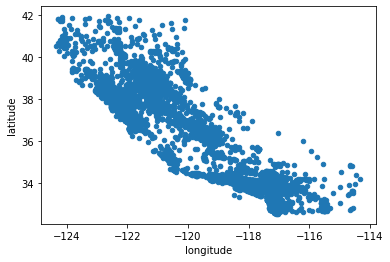

In [30]:
housing.plot(kind="scatter", x="longitude", y="latitude")

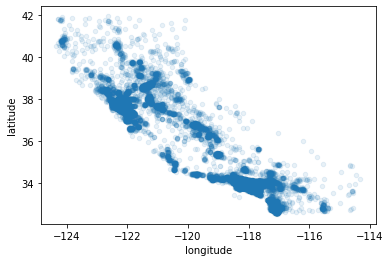

In [31]:
#overloaded plot function allowing us to see density better
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

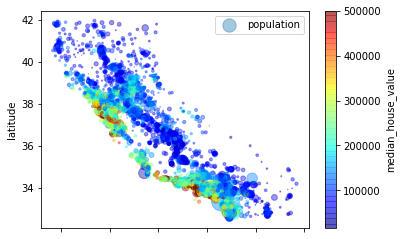

In [32]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", c="median_house_value",
            cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()